In [1]:
#!pip install qiskit qiskit-aer pylatexenc 

## Deutsch's problem

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [3]:
function = "f3"  #f0, f1, f2 or f3
# f0 : f(0) = 0, f(1) = 0
# f1 : f(0) = 0, f(1) = 1
# f2 : f(0) = 1, f(1) = 0
# f3 : f(0) = 1, f(1) = 1

In [4]:
qubits = QuantumRegister(2, name="q")
clas = ClassicalRegister(1, name="c")

circuit = QuantumCircuit(qubits, clas)

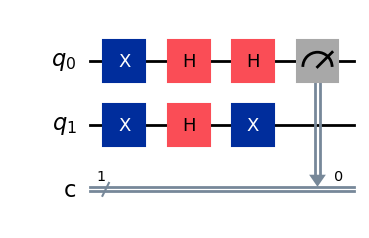

In [5]:
x,y = qubits

# Pre-processing
circuit.x(x)
circuit.x(y)
circuit.h(x)
circuit.h(y)

# Pick one of the functions below
# if(function == "f0") : add nothing
if(function == "f1") :
    circuit.cx(x,y)
if(function == "f2") :
    circuit.x(y)
    circuit.cx(x,y)
if(function == "f3") :
    circuit.x(y)

# Post-processing
circuit.h(x)

# Measure only one qubit to a classical register
circuit.measure(x,clas)

circuit.draw("mpl")

In [6]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [7]:
backend = QasmSimulator()
trans = transpile(circuit, backend)

In [8]:
job = backend.run(trans, shots=1000)

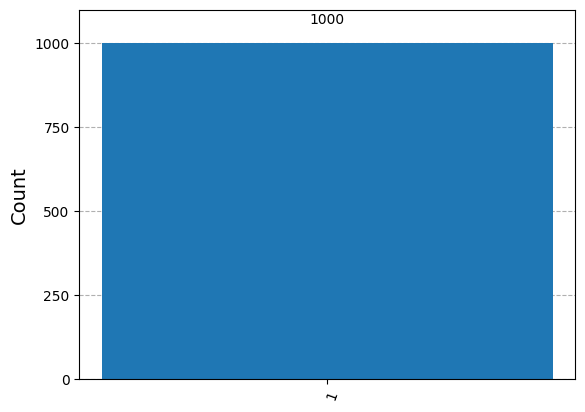

In [9]:
counts = job.result().get_counts()
plot_histogram(counts)

if counts are (mostly) **0**: function was *odd*  (f1, f2)  
if counts are (mostly) **1**: function was *even* (f0, f3)